# Multi-Class Logistic Regression for Face Classification

Import the required libraries

In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pickle
#import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from PIL import Image
import matplotlib as mp
import os
from IPython.display import Image as im
import seaborn as sns
sns.set()

The following code is for multiclass logistic regression which uses softmax cross entropy loss for classifying data.

The fit method starts with finding the number of unique classes so tht it can be used for one hot encoding the classes.The labels are the one hot encoded.The weights are initialized by 0's.The weights are assigned for each class.

The optimization step starts and calculated the loss function.Our goal with gradient descent is to find the optimal weights: minimize the loss
function we’ve defined for the model. 

The cross entropy loss is shown below

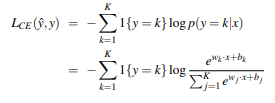

In [2]:

im(filename=r'C:\Users\Rishab\Pictures\logistic_reg5.png')

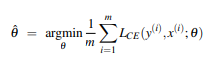

In [3]:
im(filename=r'C:\Users\Rishab\Pictures\logistic_reg1.png')

Gradient descent
is a method that finds a minimum of a function by figuring out in which direction
(in the space of the parameters θ) the function’s slope is rising the most steeply,
and moving in the opposite direction

The magnitude of the amount to move in gradient descent is the value of the slope
d
dw learning rate f(x;w) weighted by a learning rate η. A higher (faster) learning rate means that
we should move w more on each step. The change we make in our parameter is the
learning rate times the gradient

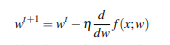

In [4]:
im(filename=r'C:\Users\Rishab\Pictures\logistic_reg2.png')

It turns out that the derivative of this function for one observation vector x is

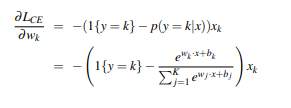

In [5]:
im(filename=r'C:\Users\Rishab\Pictures\logistic_reg4.png')

The softmax function for multiclass is given by

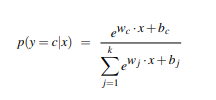

In [6]:
im(filename=r'C:\Users\Rishab\Pictures\logistic_reg6.png')

This type of logistic regression is also sometimes called as multinomial logistic regression

In [7]:
class LogisticRegression:
    
    def __init__(self):
        self.n_iter = None
        self.classes=None
        self.class_labels=None
        self.loss=None
        self.weights=None
        self.learning_rate=None
    
    def fit(self, X_data, y,learning_rate=0.001, n_iter = 2500): 
        self.classes = np.unique(y)
        
        self.class_labels = {c:i for i,c in enumerate(self.classes)}    
        
        X_data = np.insert(X_data, 0, 1, axis=1)
        
        y = np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]       
        
        self.loss = list()
        
        self.n_iter=n_iter
        
        self.weights = np.zeros(shape=(len(self.classes),X_data.shape[1]))
        
        for i in range(self.n_iter):
            
            loss=-1*np.mean(y*np.log(self.predict_(X_data)))
            
            self.loss.append(loss)
            
            diff=y - self.predict_(X_data)
            
            self.weights=self.weights+learning_rate*(np.dot(diff.T,X_data))
            
            if(i%100==0):
                print(f'Iteration : {i} Loss: {loss}')
        
        return self.loss,self.weights
    
    def predict(self,data):
        
        return self.predict_(np.insert(data, 0, 1, axis=1))
    
    def predict_(self, data):
        
        num_classes=len(self.classes)
        
        pre_vals = np.dot(data, self.weights.T).reshape(-1,num_classes)
        
        return np.exp(pre_vals-np.max(pre_vals)) / np.sum(np.exp(pre_vals-np.max(pre_vals)), axis=1).reshape(-1,1)
    
    def predict_classes(self, data):
        probs_ = self.predict(data)        
        return np.vectorize(lambda c: self.classes[c])(np.argmax(probs_, axis=1))
    
    def get_classes(self, data):
        predictions=self.predict_classes(data)
        return self.predict_classes(data)

The code belowe loads the images.Note that the images in the beginning are coloured,they are 256*256*3 dimensional by default where each channel is for R,G AND B respectively.We load the image resize it to 90*90 and convert it into a 2d array and change it to grayscale.This process is called downscaling of images.The unique classes with each count is present.Each face has 65 samples and there are total 8 types of faces.

In [8]:
file_names=os.listdir(r'C:\Users\Rishab\Assignment-3\A3\dataset')
len(file_names)
#image_arr=np.array([np.array(Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)) for fname in file_names])
image_arr=[]
for fname in file_names:
    image=Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)
    sz=(90,90)
    image=image.resize(sz)
    image_arr.append(np.array(image))
image_arr=np.array(image_arr)
rgb_weights = [0.2989, 0.5870, 0.1140]
images_2d =np.array([np.dot(img[...,:3], rgb_weights) for img in image_arr]) 
image_2d=images_2d
images_2d=images_2d.reshape(520,-1)
image_classes=[]
for filename in file_names:
    clas=int(filename.split('_')[0])
    image_classes.append(clas)
image_classes=np.array(image_classes)
print(np.unique(image_classes,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([65, 65, 65, 65, 65, 65, 65, 65], dtype=int64))


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_2d,image_classes,test_size=0.2)

# PCA on images

Face recognition is the challenge of classifying whose face is in an input image. This is different than face detection where the challenge is determining if there is a face in the input image.irst of all, if we have a large database of faces, then doing this comparison for each face will take a while! Imagine that we’re building a face recognition system for real-time use! The larger our dataset, the slower our algorithm. But more faces will also produce better results! We want a system that is both fast and accurate......................................... Dimensionality reduction is a type of unsupervised learning where we want to take higher-dimensional data, like images, and represent them in a lower-dimensional space...................................... One technique of dimensionality reduction is called principal component analysis (PCA). The idea behind PCA is that we want to select the hyperplane such that when all the points are projected onto it, they are maximally spread out. In other words, we want the axis of maximal variance! ...................................... But how do we figure out this axis? We can borrow a term from linear algebra called eigenvectors!This technique is also called eigenfaces. .......................................... we compute the covariance matrix of our data and consider that covariance matrix’s largest eigenvectors. Those are our principal axes and the axes that we project our data onto to reduce dimensions. Using this approach, we can take high-dimensional data and reduce it down to a lower dimension by selecting the largest eigenvectors of the covariance matrix and projecting onto those eigenvectors............................. Since we’re computing the axes of maximum spread, we’re retaining the most important aspects of our data. It’s easier for our classifier to separate faces when our data are spread out as opposed to bunched together.............................................

In [10]:
x_train_mean=np.mean(x_train,axis=0)
image_mid=x_train-x_train_mean
covariance_matrix=np.cov(image_mid.T)

In [11]:
image_mid.shape

(416, 8100)

In [12]:
from scipy.linalg import eigh
eig_values, vectors = eigh(covariance_matrix)
eig_pairs = [(eig_values[index],vectors[:,index]) for index in range(len(eig_values))]
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eig_values))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_values))]
eigvalues_sort=np.array(eigvalues_sort)
eigvectors_sort=np.array(eigvectors_sort)
indexes=eig_values.argsort()[::-1]
egval=eig_values[indexes]
egvec=vectors[:,indexes]

In [13]:
def redraw_image(eig_vec,orig_image,num_components):
    reduced_vec=np.array(eig_vec[:,:num_components])
    print(reduced_vec.shape)
    temp_images=np.dot(reduced_vec.T,orig_image.T)
    print(temp_images.shape)
    new_images=np.dot(reduced_vec,temp_images)
    new_images=new_images.T
    print(new_images.shape)
    return new_images

In [14]:
new_images_train=redraw_image(egvec,x_train,300)

(8100, 300)
(300, 416)
(416, 8100)


Scale the images to avoid overflow in np.exp() function of logistic regression.

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standardized_images_train=sc.fit_transform(new_images_train)
standardized_images_test=sc.transform(x_test)

The training loss vs number of iterations has been plotted. 

Iteration : 0 Loss: 0.2599301927099794
Iteration : 100 Loss: 0.0029425323069118612
Iteration : 200 Loss: 0.0017048269042136267
Iteration : 300 Loss: 0.0012331843612129467
Iteration : 400 Loss: 0.0009737883293852883
Iteration : 500 Loss: 0.0008073321690172906
Iteration : 600 Loss: 0.0006907169183988139
Iteration : 700 Loss: 0.0006041877283366763
Iteration : 800 Loss: 0.000537303163981162
Iteration : 900 Loss: 0.00048398958336486986


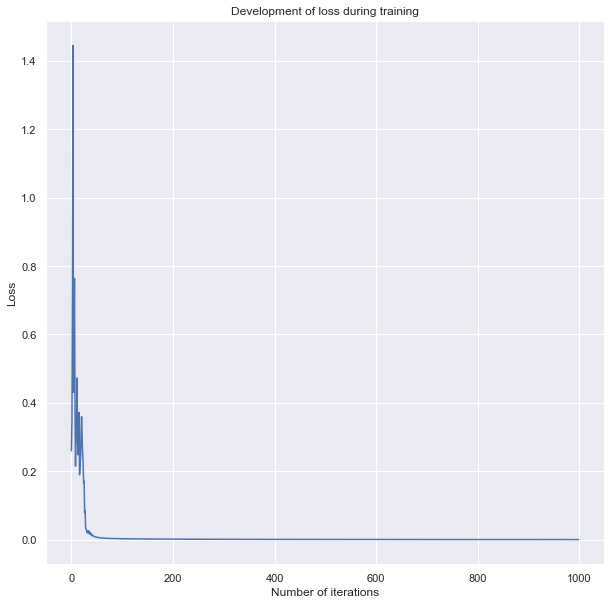

In [16]:
model = LogisticRegression()
loss,weights=model.fit(standardized_images_train,y_train,learning_rate=0.0001,n_iter=1000)
predictions=(model.get_classes(standardized_images_test))
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(len(loss)),loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [17]:
y_test

array([1, 6, 3, 1, 1, 2, 5, 2, 3, 1, 2, 3, 3, 1, 6, 7, 0, 0, 5, 5, 5, 0,
       3, 7, 0, 3, 0, 1, 5, 3, 2, 7, 0, 6, 5, 7, 6, 1, 4, 2, 1, 4, 5, 5,
       1, 5, 0, 6, 4, 1, 6, 2, 3, 7, 4, 5, 3, 5, 4, 7, 0, 0, 4, 0, 3, 5,
       1, 2, 3, 7, 1, 1, 5, 6, 2, 5, 2, 2, 3, 3, 2, 5, 2, 0, 1, 7, 3, 4,
       4, 5, 7, 1, 6, 2, 2, 0, 1, 3, 6, 4, 3, 6, 6, 3])

In [18]:
predictions

array([4, 2, 3, 1, 2, 6, 5, 2, 3, 1, 2, 3, 3, 1, 6, 7, 7, 0, 5, 7, 0, 6,
       3, 4, 0, 3, 0, 1, 5, 4, 1, 7, 7, 6, 5, 7, 6, 1, 4, 2, 1, 4, 5, 3,
       1, 0, 0, 7, 4, 1, 2, 2, 7, 7, 4, 5, 4, 5, 5, 0, 7, 0, 4, 0, 4, 5,
       1, 2, 3, 7, 0, 1, 5, 1, 2, 5, 2, 2, 5, 3, 2, 5, 2, 2, 1, 7, 3, 4,
       4, 5, 7, 1, 6, 2, 6, 0, 0, 3, 2, 4, 3, 6, 6, 3])

I got 72% accuracy for 104 test samples and 416 training samples.This accuracy may change a little due to randomness,but lies with the range of 62%-72%.

# Accuracy

In [19]:
accuracy_score(y_test,predictions)*100

72.11538461538461

# F1-score

In [20]:
f1_score(y_test,predictions,average='micro')

0.7211538461538461

# Confusion Matrix

(104,)
(104,)


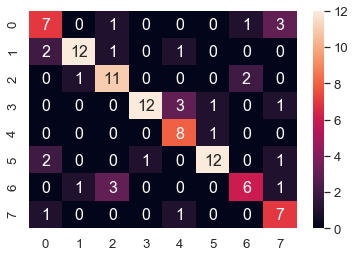

In [23]:
print(predictions.shape)
print(y_test.shape)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
df_cm = pd.DataFrame(cm, range(8), range(8))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g") #, cmap='viridis')# font size

# Comparison with sklearn logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
file_names=os.listdir(r'C:\Users\Rishab\Assignment-3\A3\dataset')
len(file_names)
#image_arr=np.array([np.array(Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)) for fname in file_names])
image_arr=[]
for fname in file_names:
    image=Image.open(r'C:\Users\Rishab\Assignment-3\A3\dataset\\'+fname)
    sz=(90,90)
    image=image.resize(sz)
    image_arr.append(np.array(image))
image_arr=np.array(image_arr)
rgb_weights = [0.2989, 0.5870, 0.1140]
images_2d =np.array([np.dot(img[...,:3], rgb_weights) for img in image_arr]) 
image_2d=images_2d
images_2d=images_2d.reshape(520,-1)
image_classes=[]
for filename in file_names:
    clas=int(filename.split('_')[0])
    image_classes.append(clas)
image_classes=np.array(image_classes)
print(np.unique(image_classes,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([65, 65, 65, 65, 65, 65, 65, 65], dtype=int64))


In [25]:
images_2d.shape

(520, 8100)

In [26]:
from sklearn.preprocessing import StandardScaler
standardized_images=StandardScaler().fit_transform(images_2d)
x_train,x_test,y_train,y_test=train_test_split(standardized_images,image_classes,test_size=0.1)

In [27]:
clf = LogisticRegression(random_state=0,max_iter=1000).fit(x_train, y_train)

In [28]:
print(accuracy_score(clf.predict(x_test),y_test))

0.7115384615384616


We see that sklearn gives nearly same accuracy as our model,means our model performs good enough.